### Initial Data Exploration 
* We need to answer some questions along our project.
#### Question: 
* 1- "what does each feature represent"?, so that we can establish the domain context necessary to prepare the data for all the analysis and modeling that comes next.
 

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("/kaggle/input/playground-series-s5e10/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e10/test.csv")
df = train_data.copy()

In [2]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


### Feature description
* id: A unique identifier.
* road_type: Categorical feature indicating the classification of the road, which influences traffic volume, design standards, and speed.
* num_lanes: The total count of lanes available for travel (e.g., 2, 4, 6). More lanes can mean higher traffic capacity but might also introduce more complex merging/weaving, potentially affecting risk.
* curature: A measure of how much the road bends. Higher curvature generally means sharper turns, which is associated with increased accident risk, especially if combined with high speed.
* speed_limit: The legally maximum speed allowed on that road segment.
* lighting: Categorical feature describing the level of illumination on the road.
* weather: Categorical feature describing the prevailing meteorological conditions. Examples include Clear or Foggy.
* road_signs_present: A binary (True/ False) feature indicating the presence of informational road signs.
* public_road: A binary feature (True/False) indicating whether the road segment is publicly maintained and accessible versus being a private or restricted road.
* time_of_day: Categorical feature indicating the specific time when accidents occurred.
* holiday: A binary feature (True/False) indicating whether the time period falls on a major public holiday.
* school_season: A binary feature (True/False) indicating whether the time period is within the active school year.
* num_reported_accidents: The historical count or frequency of accidents that have occurred on this road segment. This is a summary feature that often directly correlates with and helps inform the target risk.
* accident_risk: This is our Target Variable

#### Question: 
* 2- Is there missing data?
* 3- Are there outliers? if so, which feature and how significant?

In [3]:
df.info(), df.isna().sum().sum(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

(None, 0, (517754, 14))

In [4]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [5]:
df.describe(include = ['object', 'bool'])

,road_type,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season
count,517754,517754,517754,517754,517754,517754,517754,517754
unique,3,3,3,2,2,3,2,2
top,highway,dim,foggy,False,True,morning,True,False
freq,173672,183826,181463,259289,260045,173410,260688,260164


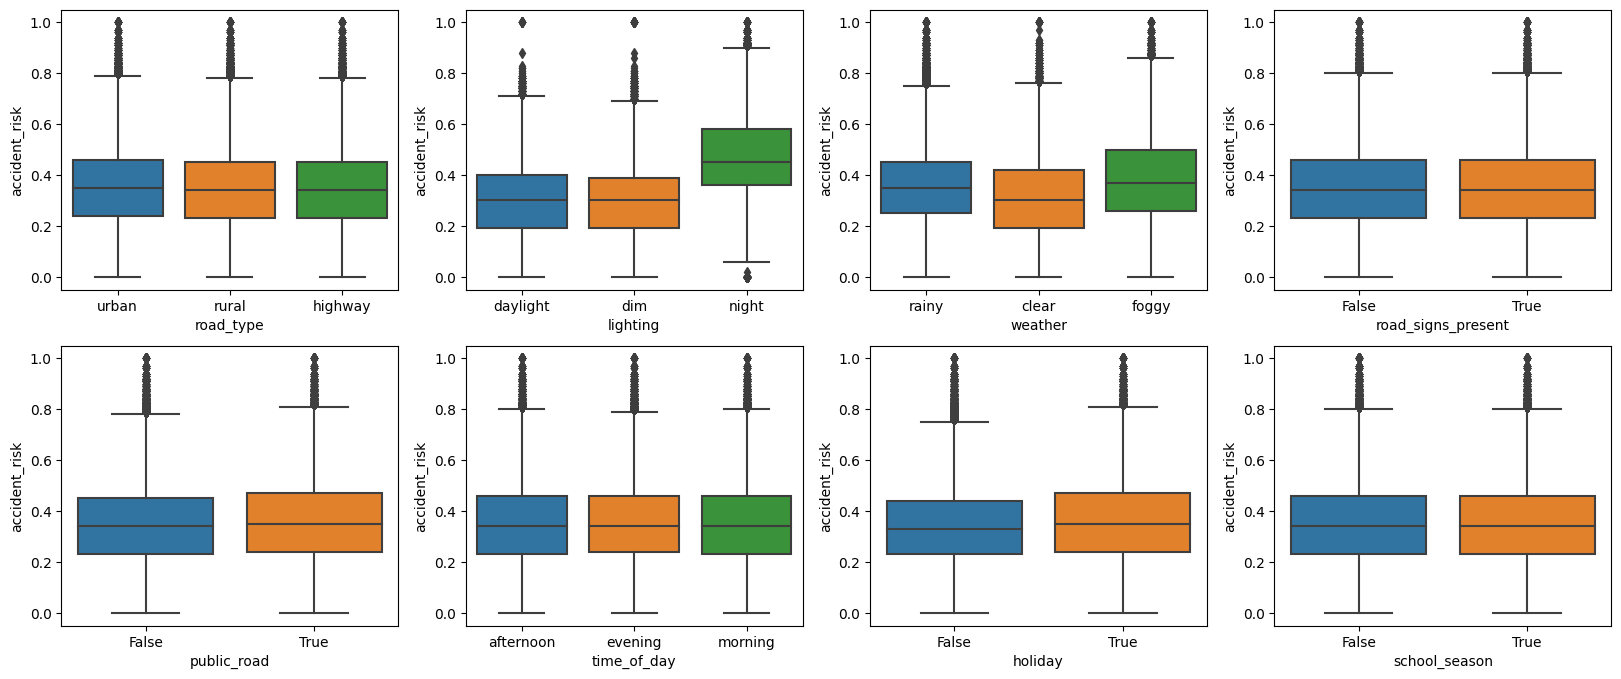

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

box_cols = df.select_dtypes(include = ['object', 'bool'])

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20,8))
axes = axes.flatten()

for i, col in enumerate(box_cols):
    ax = axes[i]
    sns.boxplot(x = col , y = "accident_risk", data = df, ax = ax)


plt.show()

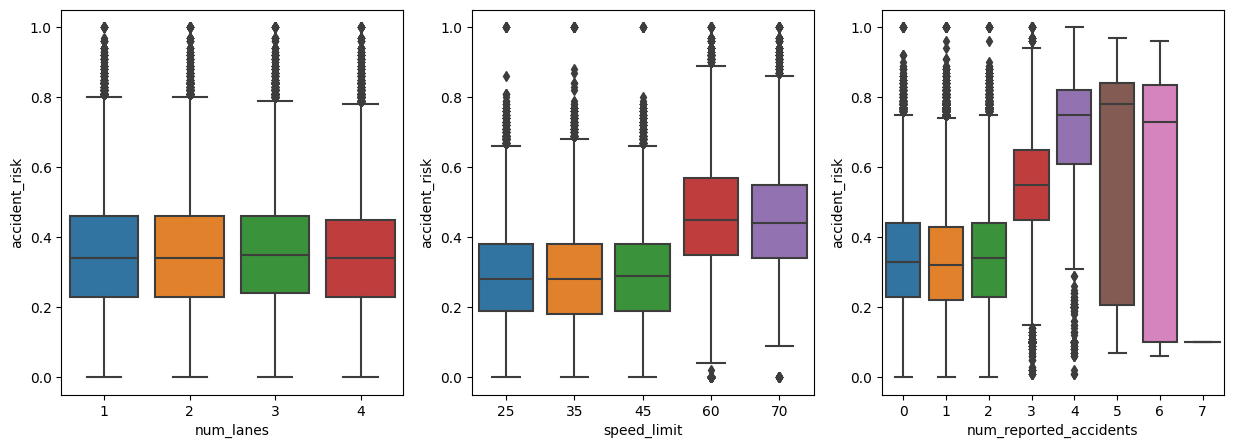

In [9]:
box_cols = ['num_lanes', 'speed_limit', "num_reported_accidents"]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
axes = axes.flatten()

for i, col in enumerate(box_cols):
    ax = axes[i]
    sns.boxplot(x = col, y = 'accident_risk', data = df, ax = ax)

plt.show()

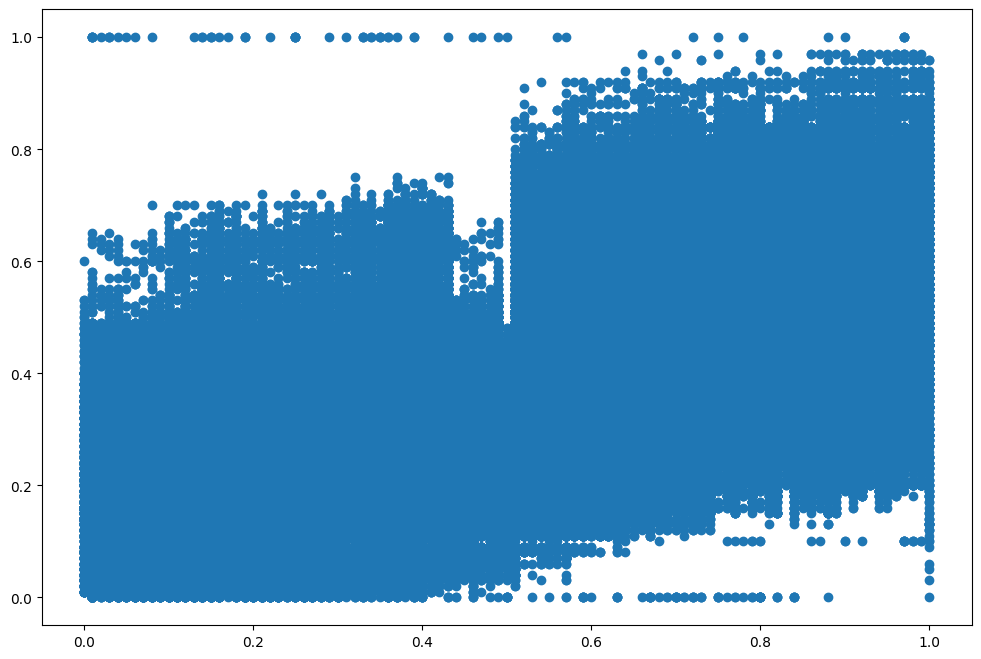

In [11]:
plt.figure(figsize = (12,8))
plt.scatter(x = df['curvature'] , y = df["accident_risk"])
plt.show()

#### Answer:
* A full scan confirms no explicit missing values were found in the dataset
* Clear outliers in the Accident Risk feature are confirmed by the visualizations. There exist high-end skewness. We will address this via log transformation or by switching to robust tree-based models.

#### Question: 
* 4- what is the distribution of the target variable?

<Axes: >

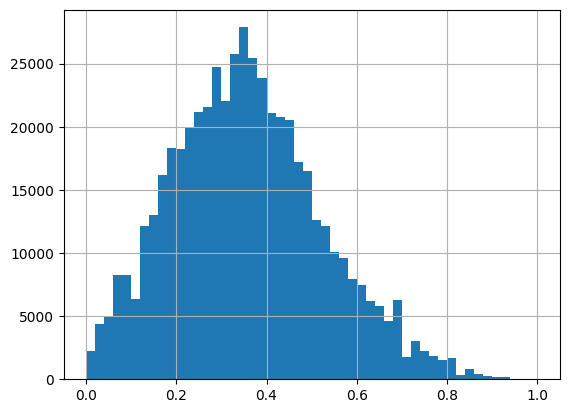

In [12]:
df['accident_risk'].hist(bins = 50)

#### Answer: 
* The histogram shows a clear right skewness which confirms our initial assumption that we need log transformation on the target or choose tree-based model.

#### Question:
* 5- How are the features related to each other?

In [13]:
df['time_of_day'].unique(), df['lighting'].unique()

(array(['afternoon', 'evening', 'morning'], dtype=object),
 array(['daylight', 'dim', 'night'], dtype=object))

In [14]:
lighting_order = {'dim': 1, 'night': 2, 'daylight': 3}
time_order = {'morning': 1, 'afternoon': 2, 'evening': 3}

df['lighting_Ordinal'] = df['lighting'].map(lighting_order)
df['time_of_day_Ordinal'] = df['time_of_day'].map(time_order)

df.drop(['time_of_day', 'lighting'], axis = 1, inplace = True)

In [15]:
df_one = pd.get_dummies(df, drop_first = True)

In [16]:
corr_matrix = df_one.corr()
corr_matrix["accident_risk"].sort_values(ascending = False)

accident_risk             1.000000
curvature                 0.543946
speed_limit               0.430898
num_reported_accidents    0.213891
weather_foggy             0.149758
holiday                   0.051129
weather_rainy             0.036137
public_road               0.031032
road_type_urban           0.021463
lighting_Ordinal          0.011172
time_of_day_Ordinal       0.009259
id                        0.000969
road_signs_present        0.000629
school_season            -0.000977
num_lanes                -0.006003
road_type_rural          -0.010121
Name: accident_risk, dtype: float64

<Axes: >

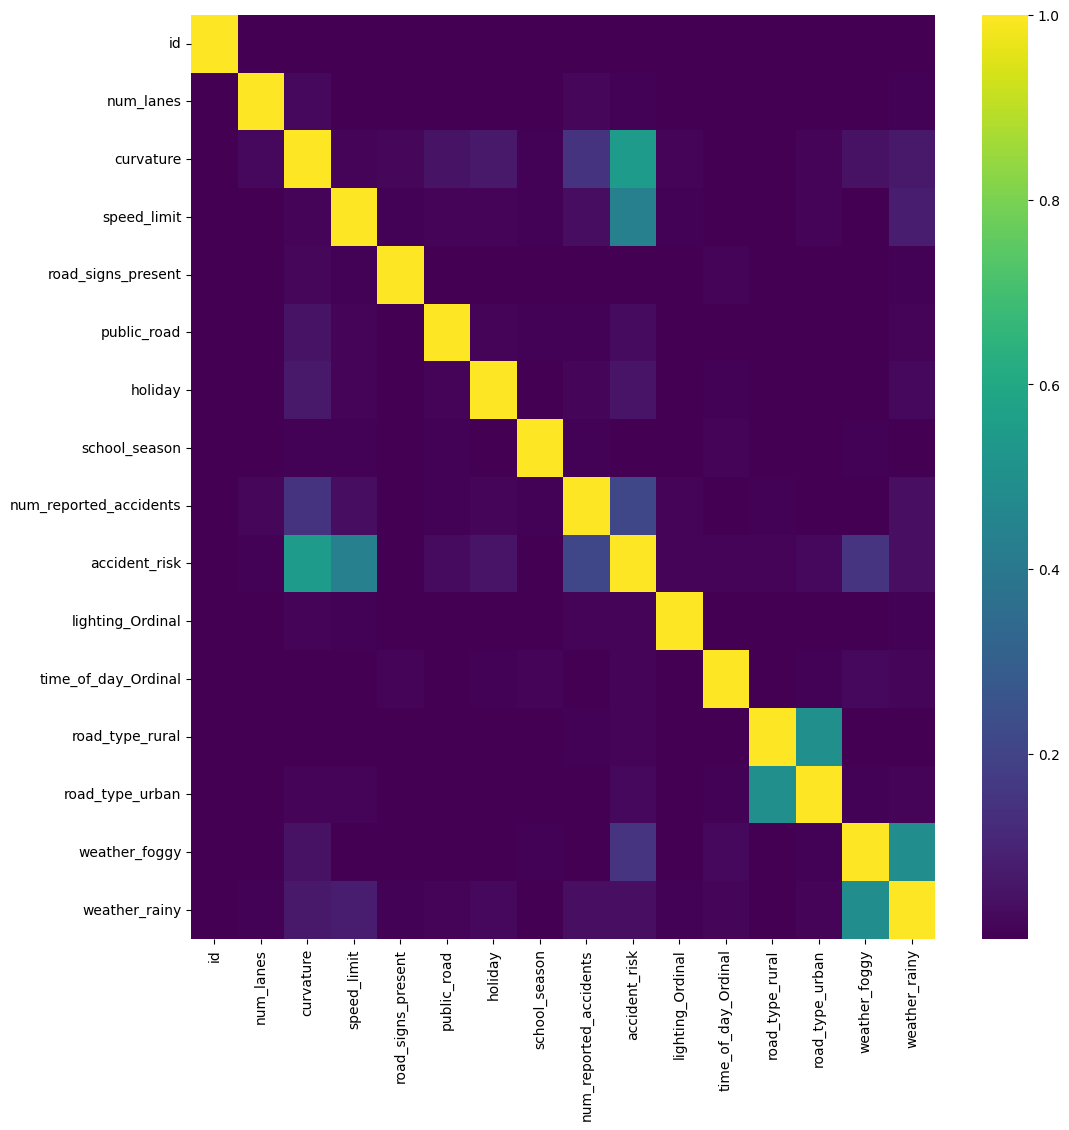

In [17]:
plt.figure(figsize = (12,12))
sns.heatmap(np.abs(corr_matrix), cmap = 'viridis')

###### Answer:
* The correlation matrix and visualizations reveal a medium to high linear relationship between the target variable `Accident Risk` and two numerical features: `curvature` and `speed limit`.
* A multicollinearity between the the `weather_foggy` and `weather_rainy` suggesting that we need to group them in one poor visibility feature.

#### Question:
* 6- Which Features are most important to the target?

In [18]:
from sklearn.linear_model import Lasso

bool_cols = df_one.select_dtypes(include = ['bool'])
df_one[bool_cols] = df_one[bool_cols.columns].astype(int)


X = df_one.drop(['id', 'accident_risk'], axis = 1)
y = df_one['accident_risk']

lasso = Lasso(alpha = 0.1)
lasso.fit(X,y)

feature_importance = pd.DataFrame({"Feature": X.columns, "coef": np.abs(lasso.coef_)})
feature_importance

/tmp/ipykernel_37/2335424586.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_one[bool_cols] = df_one[bool_cols.columns].astype(int)


,Feature,coef
0,num_lanes,0.000000
1,curvature,0.000000
2,speed_limit,0.004141
3,road_signs_present,0.000000
4,public_road,0.000000
5,holiday,0.000000
6,school_season,0.000000
7,num_reported_accidents,0.000000
8,lighting_Ordinal,0.000000
9,time_of_day_Ordinal,0.000000


In [19]:
from sklearn.ensemble import RandomForestRegressor

X = X[:100000]
y = y[:100000]

rf_model = RandomForestRegressor(
    n_estimators=100,       
    max_depth=10,             
    random_state=42,           
    n_jobs=-1                 
)

rf_model.fit(X, y)

importance_scores = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores
})


feature_importance_df = feature_importance_df.sort_values(
    by='Importance', 
    ascending=False
).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,curvature,0.363700
1,lighting_Ordinal,0.255944
2,speed_limit,0.251321
3,num_reported_accidents,0.051881
4,weather_foggy,0.043048
5,weather_rainy,0.030038
6,num_lanes,0.000922
7,time_of_day_Ordinal,0.000629
8,holiday,0.000594
9,public_road,0.000463


#### Answer:
* The data's non-linear structure, confirmed by Lasso's failure, Moreover the use of Random Forest, identified Curvature (36%), Lighting (26%), and Speed Limit (25%) as the main drivers, accounting for $\approx 87\%$ of the model's predictive power, along with effectively rendering 8 of the 14 features non-predictive.

#### Question: 
* 7- Can i create new, more infomative features?
#### Answer:
* Yes. The low but similar importance scores for $\text{weather\_foggy}$ and $\text{weather\_rainy}$ suggest they capture the same underlying risk factor (poor visibility/wet conditions). Given their moderate collinearity (0.6 to 0.8), combining them into a single 'poor_visibility' category is justified to simplify the model, concentrate the predictive signal, and reduce redundancy. __This was determined from question 5 and 6__
  
#### Question:
* 8- Do we need to transform any feature?
#### Answer:
* Yes, the target variable needs a log transfomation as it shows a right skewed distribution. __This was determined from question 4__


#### Question:
* 9- What is the type of my task?


In [3]:
df[['accident_risk']]

,accident_risk
0,0.13
1,0.35
2,0.30
3,0.21
4,0.56
...,...
517749,0.32
517750,0.26
517751,0.19
517752,0.51


#### Answer:
* The goal is to predict the continuous numerical probability of a road `accident_risk`, making this a Regression problem

#### Question:
* 10- What is the baseline performance? Which metric best reflects the project goal?

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df.drop(['id', "accident_risk"], axis = 1)
y = df['accident_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

baseline_value = y_train.mean()

baseline_predictions = np.full(shape = len(y_test), fill_value = baseline_value)

baseline_mae = mean_absolute_error(y_test, baseline_predictions)

baseline_mse = mean_squared_error(y_test, baseline_predictions)

baseline_rmse = np.sqrt(baseline_mse)

print("\n--- BASELINE PERFORMANCE ---")
print(f"Mean Absolute Error (MAE): {baseline_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {baseline_rmse:.4f}")


--- BASELINE PERFORMANCE ---
Mean Absolute Error (MAE): 0.1328
Root Mean Squared Error (RMSE): 0.1662


#### Answer: 
* Based on the competition requirements, the primary evaluation metric for this regression task is the Root Mean Squared Error (RMSE).
* The established baseline performance for this regression task is a Root Mean Squared Error (RMSE) of 0.16.
* This result was obtained using the Mean Predictor model, which predicts the average accident probability from the training set for all test observations.

In [8]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


#### Question: 
* 11- Can we break the current performance plateau by levering more complex models?

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

df = train_data.copy()

lighting_order = {'dim': 1, 'night': 2, 'daylight': 3}

top_5_columns = ['curvature', 'speed_limit', 'lighting', 'num_reported_accidents', 'weather', 'num_lanes']

X = df[top_5_columns]
y = df['accident_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

def lighting_transformation(X):  
    
    X_array = X.values
    
    if X.ndim > 1:
        X_array = X_array.flatten()

    return pd.Series(X_array).map(lighting_order).values.reshape(-1,1)

def weather_transformation(X):
    
    X_array = X.values
    
    if X.ndim > 1:
        X_array = X_array.flatten()

    is_poor_visibility_mask = pd.Series(X_array).isin(['foggy', 'rainy'])
        
    poor_visibility = is_poor_visibility_mask.astype(int).values

    return poor_visibility.reshape(-1,1)

y_train_log = np.log1p(y_train)

lighting_pipeline = Pipeline([
    ("lighting_Ordinal", FunctionTransformer(lighting_transformation))
])

weather_pipeline = Pipeline([
    ("poor_visibility", FunctionTransformer(weather_transformation))
])

preprocessing = ColumnTransformer([
    ('light', lighting_pipeline, ['lighting']),
    ('visibility', weather_pipeline, ['weather']),
], remainder = 'passthrough')

model = Pipeline([
    ('preprocessor', preprocessing), 
    ('Regressor', RandomForestRegressor(n_estimators = 100, max_depth = 10))
])         

# -cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

array([0.05658619, 0.05633934, 0.05635559, 0.05638896, 0.05653535])

In [12]:
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- Complex Model PERFORMANCE ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


--- Complex Model PERFORMANCE ---
Mean Absolute Error (MAE): 0.0438
Root Mean Squared Error (RMSE): 0.0562


#### Answer:
* We achieved a significant improvement over the baseline model, reducing the error to an RMSE of 0.0562.
* This score represents a $\mathbf{64.9\%}$ improvement in predictive accuracy compared to the Mean Predictor baseline (which had an estimated RMSE of $\approx 0.16$). This justifies the use of the complex ensemble approach

In [14]:
y_pred_log = model.predict(test_data[top_5_columns])
y_pred = np.expm1(y_pred_log)

In [15]:
output = pd.DataFrame({'id': test_data['id'], "accident_risk": y_pred})

In [17]:
output.to_csv("submission.csv", index = False)